# MSDS696 Data Science Practicum II

Topic: Rain Prediction in Australia using Machine Learning with Python

Date: 21AUGUST2022

Author: Olumide Aluko

Purpose: The project aims to use Rain in Australia Dataset from Kaggle. The problem is to predict whether it will rain tomorrow or not given the weather conditions of today. We will be using Decision Tree Classifier.

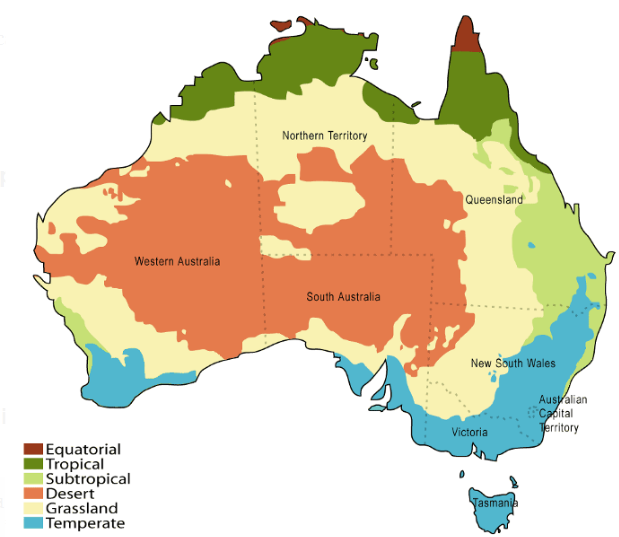

# Table of contents:

1. Problem Statement
2. Dataset Description
3. Importing Libraries
4. Configuration
5. Import Dataset
6. Train, Validation, Test Split
7. Identify Inputs & Target Columns
8. Identify Numerical & Categorical Columns
9. Impute Missing Values
10. Scaling Numerical Columns
11. Encoding Categorical Columns
12. Training & Visualizing Decision Trees
13. Feature Importance
14. Hyperparameter Tuning - To Reduce Overfitting
15. Results and Conclusion

# 1. Problem Statement:

Predict next-day rain by training classification models on the target variable using the Australia Rainfall data.

Solution: Design a predictive classification model (Decision) using machine learning algorithms to forecast whether or not it will rain tomorrow in Australia.

# 2. Data Description:

Dataset Source: https://www.kaggle.com/code/ankitjoshi97/rainfall-in-australia-eda-prediction-89-acc/data

The dataset is taken from Kaggle and contains about 10 years of daily weather observations from many locations across Australia.

Dataset Description:

- Number of columns: 23
- Number of rows: 145460
- Number of Independent Columns: 22
- Number of Dependent Column: 1

# 3. Import Libraries

Let's import the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix
import pyarrow as pa
from sklearn.ensemble import RandomForestClassifier
import joblib
# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 4. Configurations

Lets set some configurations needed for matplotlib, seaborn and pandas.

In [2]:
pd.set_option('display.max_columns', None) #display unlimited columns
pd.set_option('display.max_rows', 150) #display maximum of 150 rows
sns.set_style('darkgrid') #style
matplotlib.rcParams['font.size'] = 14 #font size = 14pt
matplotlib.rcParams['figure.figsize'] = (10, 6) #figure size = (10. 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' #background color of figure

# 5. Import Dataset

Let's download the dataset and import it using pandas function read_csv().

In [3]:
# view data head
df_rain = pd.read_csv('weatherAUS.csv')
df_rain

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [4]:
#print df_rain.head
print(df_rain.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0      

Let's look at the info of the dataset,

In [5]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are 145460 samples out of which there are 142193 samples whose 'RainTomorrow' column is non-null. Therefore, we can just remove the rows in which the 'RainTomorrow' column is null since there will be no significant information loss.

In [6]:
df_rain.dropna(subset=['RainTomorrow'], inplace=True)

Checking the Dimensions of Dataset:
The shape property is utilized to detect the dimensions of the dataset.

print(df_rain.shape)

In [7]:
# view columns
df_rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Summary of a Dataset:

Let’s generate descriptive statistics for the dataset using the function describe() in pandas.

Descriptive Statistics: It is used to summarize and describe the features of data in a meaningful way to extract insights. It uses two types of statistic to describe or summarize data:

Measures of tendency
Measures of spread

In [8]:
df_rain.describe().T

count         mean        std    min     25%     50%  \
MinTemp        141556.0    12.186400   6.403283   -8.5     7.6    12.0   
MaxTemp        141871.0    23.226784   7.117618   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81350.0     5.469824   4.188537    0.0     2.6     4.8   
Sunshine        74377.0     7.624853   3.781525    0.0     4.9     8.5   
WindGustSpeed  132923.0    39.984292  13.588801    6.0    31.0    39.0   
WindSpeed9am   140845.0    14.001988   8.893337    0.0     7.0    13.0   
WindSpeed3pm   139563.0    18.637576   8.803345    0.0    13.0    19.0   
Humidity9am    140419.0    68.843810  19.051293    0.0    57.0    70.0   
Humidity3pm    138583.0    51.482606  20.797772    0.0    37.0    52.0   
Pressure9am    128179.0  1017.653758   7.105476  980.5  1012.9  1017.6   
Pressure3pm    128212.0  1015.258204   7.036677  977.1  1010.4  1015.2   
Cloud9am        88536.0     4.437189   2.887016    0.0     1.0     5.0   
Cloud3pm        85099.0     4.503167   2.720633    0.0     2.0     5.0   
Temp9am        141289.0    16.987509   6.492838   -7.2    12.3    16.7   
Temp3pm        139467.0    21.687235   6.937594   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.8    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

From the above descriptive statistics, we can deduce the following:

- The average minimum temperature is 12.19 and average maximum temperature is 23.221 degree Celcius.
- The mean rainfall is 2.35 mm. -The average sunshine recieved is 7.62 hour.
- The average wind gust speed is 40.00 km/hr.
- The minimum temperature recorded is -8.5 degree Celcius and the maximum recorded temperature is 48.1 degree Celcius. 
- The minimum rainfall recorded for a particular day is 0 mm and maximum is 371 mm. 
- The median evaporation is 4.8 mm 
- Temp ranges from -8.5 to 33 with a standard deviation of 6.4 -Hottest day in Australia had 48 degrees
- On average Wind speed remains pretty similar at 9 am and 3 pm.

In [9]:
print(df_rain.describe(include=[object]))

              Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       142193    142193      132863     132180     138415    140787   
unique        3436        49          16         16         16         2   
top     2017-06-09  Canberra           W          N         SE        No   
freq            49      3418        9780      11393      10663    109332   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316  


The statistics displayed for the attributes of 'object' datatype is different from the one displayed for numeric datatypes.
Some of the conclusions drawn from the above table are:

- There are total 49 unique locations and 16 unique wind directions.
- RainToday and RainTomorrow attribute has 2 unique values.
- The top location is Canberra occuring 3418 times.

In [10]:
df_rain.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Observations:-

- Maximum null values are present in Sunshine column followed by Evaporation.
- More than 50,000 null values are present in Cloud9am and Cloud3pm columns.
- Around 13,000 to 14,000 null values are present in Pressure9am and Pressure3pm columns.
- More than 9,000 null values are present in WindGustDir, WindGustSpeed and WindDir9am columns
- There are many columns having more than 1000 null records.

# 6. Exploratory Data Analysis and Visualization

In [11]:
# install required libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Correlations

Let’s see if we can pull out some correlations between locations based on temperature and rainfall. We do get ~(4-5) clusters of locations with similar rainfall patterns: Sydney region (Sydney, Penrith, Richmond, etc.), Perth, Central Australia and Southern Australia (Melbourne, Tasmania).

In [12]:
# PLot Correlation Matrix

corr = df_rain.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

Observation:-

- MaxTemp and Temp3pm have a strong positive correlation of 0.97.
- Pressure9am and Pressure3pm have a strong positive correlation of 0.96.
- MinTemp and Temp9am have a strong positive correlation of 0.90.
- MaxTemp and Temp9am have a strong positive correlation of 0.88.
- Temp9am and Temp3pm have a strong positive correlation of 0.85.
- Humidity and Temperature attributes have a negative correlation of 0.50.

Let us try heatmap of correlation between all features in the dataset

<AxesSubplot:>

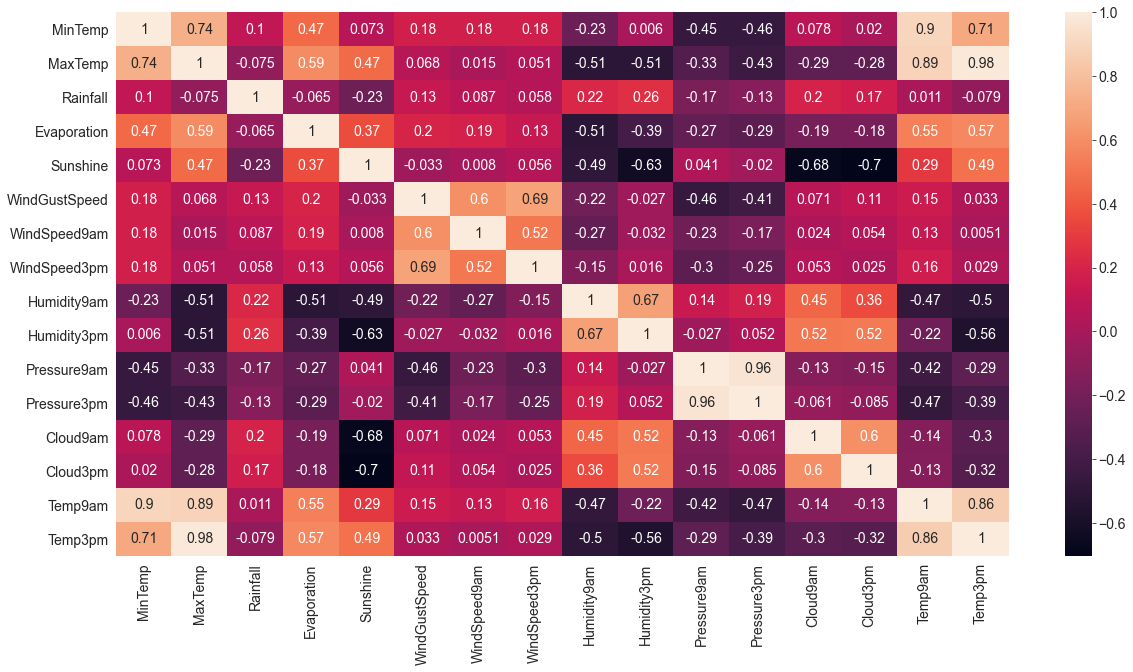

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(df_rain.corr(), annot = True)

From above heatmap of correlation, we can see that there are a few features which are impacting other and can be termed as positively correlated

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'BadgerysCreek'),
  Text(2, 0, 'Cobar'),
  Text(3, 0, 'CoffsHarbour'),
  Text(4, 0, 'Moree'),
  Text(5, 0, 'Newcastle'),
  Text(6, 0, 'NorahHead'),
  Text(7, 0, 'NorfolkIsland'),
  Text(8, 0, 'Penrith'),
  Text(9, 0, 'Richmond'),
  Text(10, 0, 'Sydney'),
  Text(11, 0, 'SydneyAirport'),
  Text(12, 0, 'WaggaWagga'),
  Text(13, 0, 'Williamtown'),
  Text(14, 0, 'Wollongong'),
  Text(15, 0, 'Canberra'),
  Text(16, 0, 'Tuggeranong'),
  Text(17, 0, 'MountGinini'),
  Text(18, 0, 'Ballarat'),
  Text(19, 0, 'Bendigo'),
  Text(20, 0, 'Sale'),
  Text(21, 0, 'MelbourneAirport'),
  Text(22, 0, 'Melbourne'),
  Text(23, 0, 'Mildura'),
  Text(24, 0, 'Nhil'),
  Text(25, 0, 'Portland'),
  Text(26, 0, 'Watsonia'),
  Text(27, 0, 'Dartmoor'),
  Text(28,

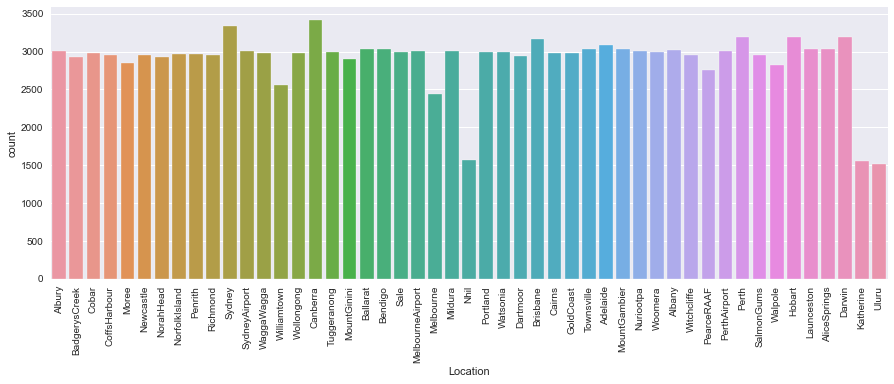

In [14]:
plt.style.use('seaborn')

# Distribution of location

plt.figure(figsize=(15, 5))
sns.countplot(df_rain['Location'])
plt.xticks(rotation=90)

Observation:-

- Most occured location is Canberra followed by Sydney.
- Most of the locations have a frequency near 3000.
- Nhil, Katherine and Uluru have occured the least.

Text(0.5, 1.0, 'Maximum Temperature')

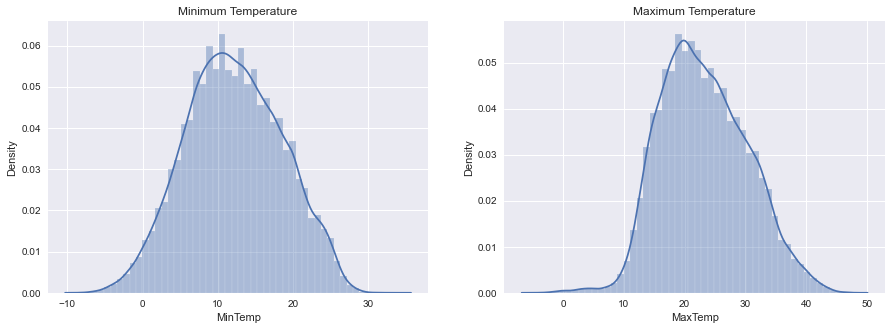

In [15]:
# Distribution of MinTemp and MaxTemp

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# MinTemp
sns.distplot(df_rain['MinTemp'], ax=ax[0])
ax[0].set_title("Minimum Temperature")

# MaxTemp
sns.distplot(df_rain['MaxTemp'], ax=ax[1])
ax[1].set_title("Maximum Temperature")

Observation:-

- The Highest concentration of points for minimum temperature is between 10 to 12 degree Celcius.
- The Highest concentration of points for maximum temperature is between 18 to 22 degree Celcius.

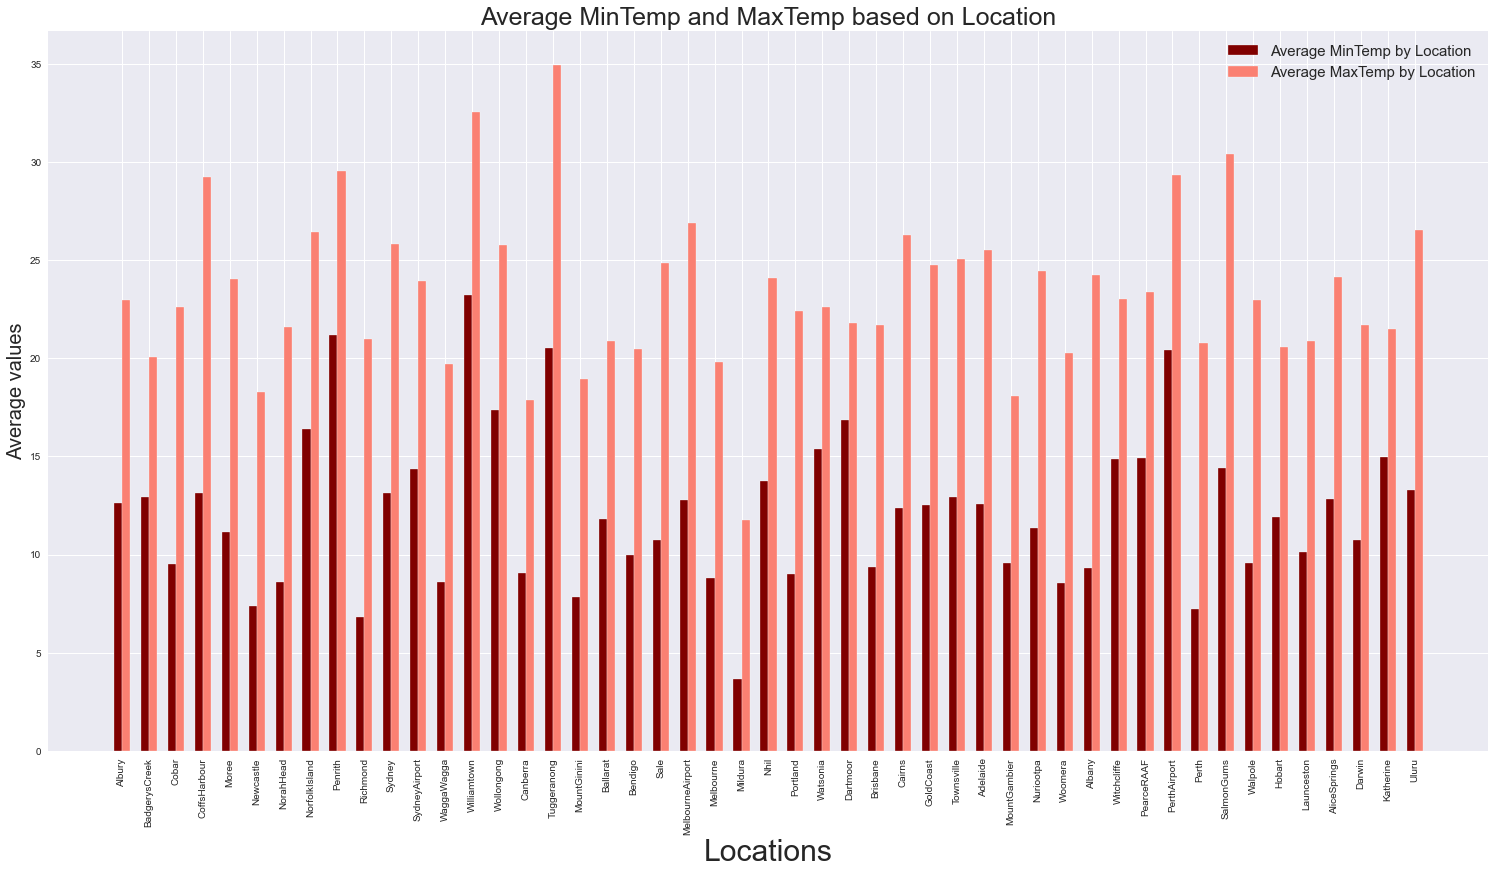

In [16]:
# MinTemp and MaxTemp of each location

a = df_rain.groupby('Location').agg({'MinTemp':'mean'})
c = df_rain.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (20,10)

n = df_rain['Location'].nunique()
x = np.arange(n)

loc = df_rain['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

w = 0.3

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)

plt.xlabel('Locations', fontsize=30)
plt.ylabel('Average values', fontsize=20)
plt.title('Average MinTemp and MaxTemp based on Location', fontsize=25)
plt.legend(fontsize=15)

Observation:-

- The average maximum temperature is above 20 degree Celcius for most locations.
- The average minimum temperature is between 5 and 15 degree Celcius for most locations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 576x288 with 0 Axes>

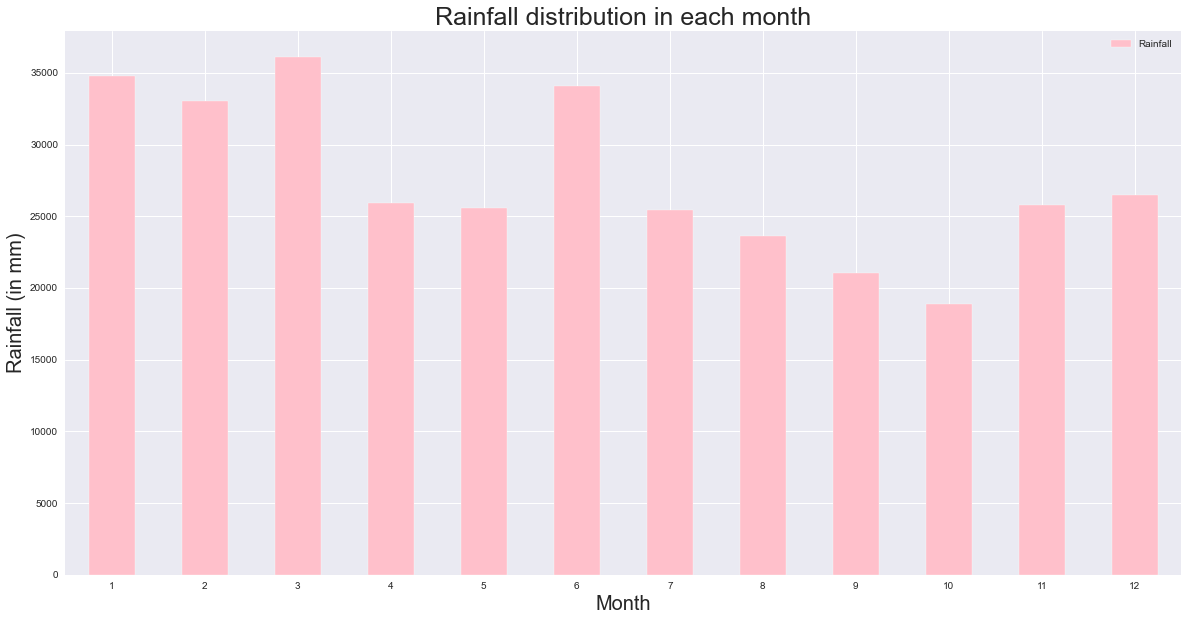

In [17]:
# Rainfall distribution in each month

df_rain['Date'] = pd.to_datetime(df_rain['Date'])

# Create a new dataframe rain_df
rainfall =[df_rain['Date'].dt.year, df_rain['Date'].dt.month, df_rain['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rain_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(8,4))
a = rain_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

Observation:-

- Maximum rainfall(greater than 35,000 mm) occurs in March.
- January and June also experience high rainfall(nearly 35,000 mm) followed by February.
- Minimum rainfall occurs in October followed by September.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2007'),
  Text(1, 0, '2008'),
  Text(2, 0, '2009'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011'),
  Text(5, 0, '2012'),
  Text(6, 0, '2013'),
  Text(7, 0, '2014'),
  Text(8, 0, '2015'),
  Text(9, 0, '2016'),
  Text(10, 0, '2017')])

<Figure size 576x288 with 0 Axes>

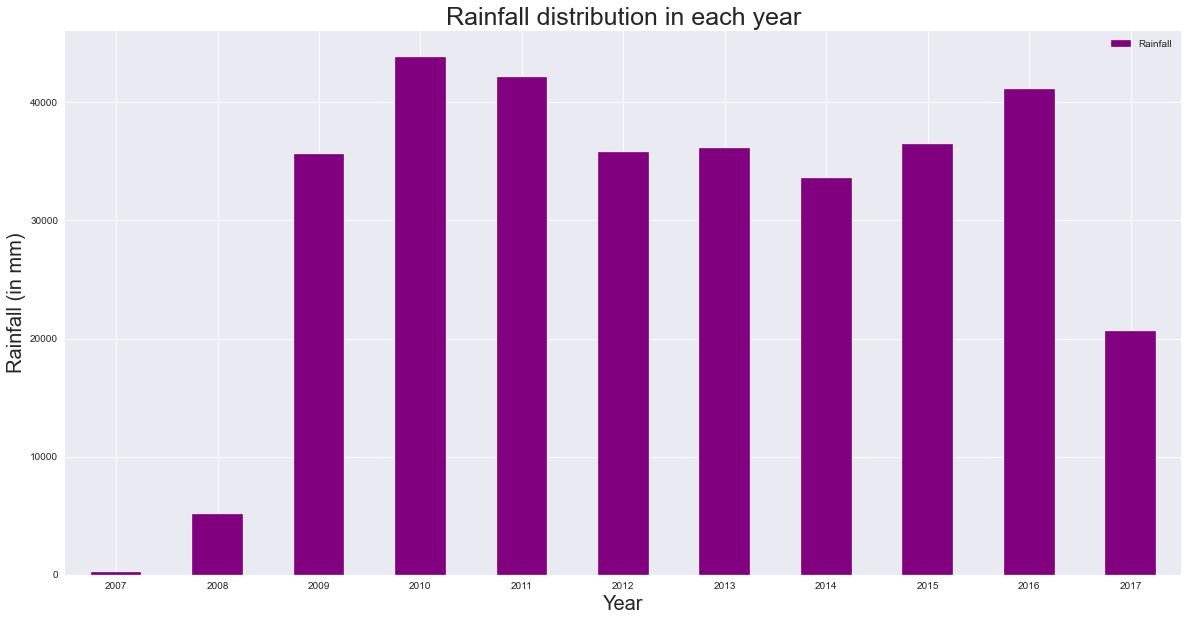

In [18]:
# Rainfall distribution in each year

plt.figure(figsize=(8,4))
a = rain_df.groupby('Year').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')
plt.title('Rainfall distribution in each year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

Observation:-

- Maximum rainfall(greater than 40,000 mm) occured in 2010 followed by 2011 and 2016.
- 2009, 2012, 2013, 2014 and 2015 experienced rainfall between 30,000-40,000 mm.
- Least rainfall(less than 200 mm) occured in 2007 followed by 2008 and 2017(greather than 20,000 mm).

Text(0.5, 1.0, 'Wind Direction at 3PM')

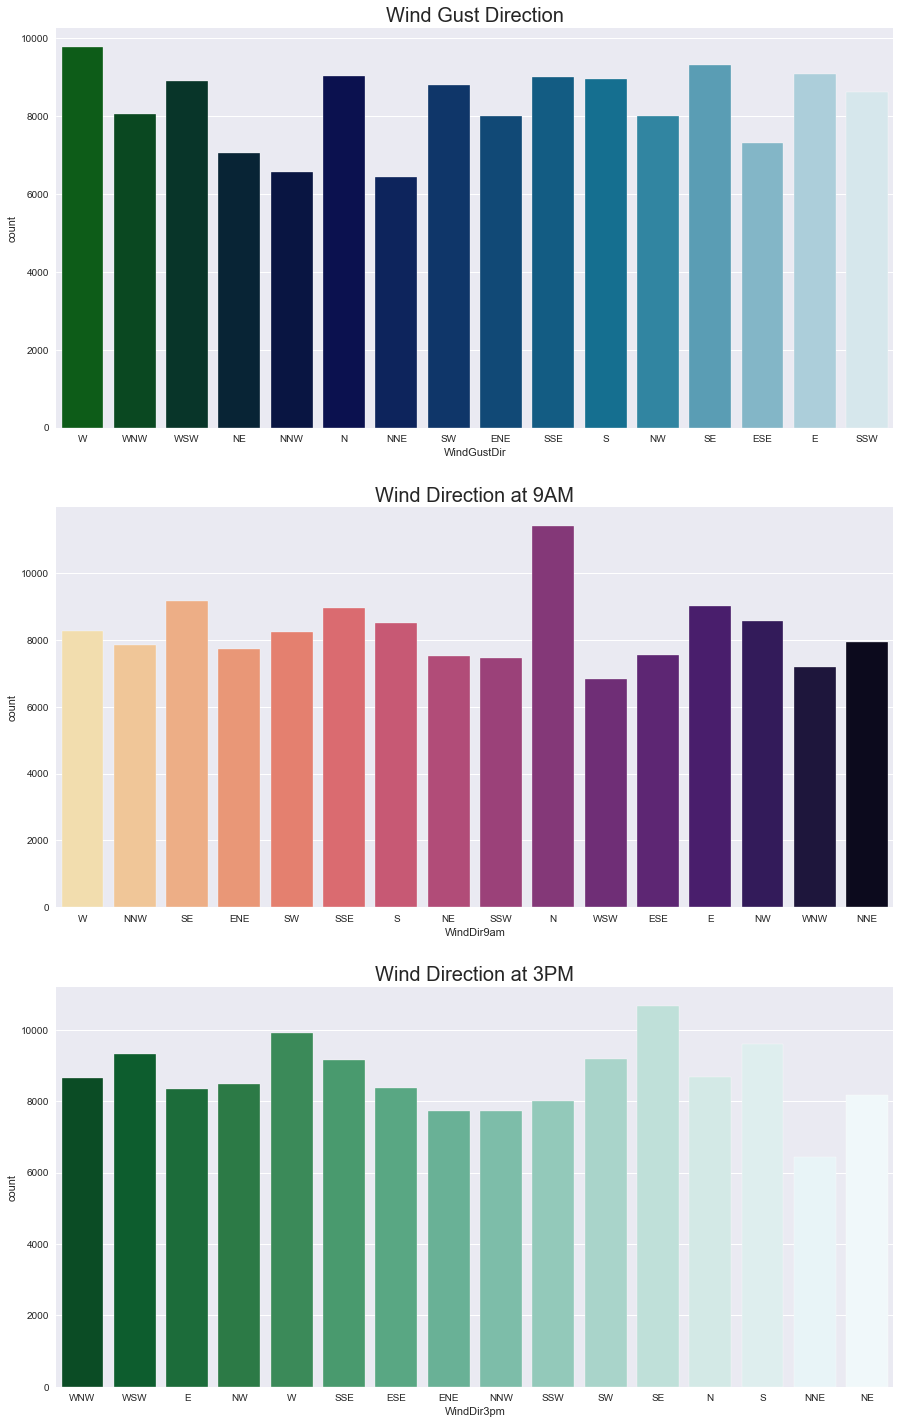

In [19]:
# Distribution of WindGustDir, WindDir9am and WindDir3pm

fig, ax = plt.subplots(3, 1, figsize=(15,25))

# WindGustDir
sns.countplot(df_rain['WindGustDir'], palette='ocean', ax=ax[0])
ax[0].set_title("Wind Gust Direction", fontsize=20)

# WindGustDir
sns.countplot(df_rain['WindDir9am'], palette='magma_r', ax=ax[1])
ax[1].set_title("Wind Direction at 9AM", fontsize=20)

# WindGustDir
sns.countplot(df_rain['WindDir3pm'], palette='BuGn_r', ax=ax[2])
ax[2].set_title("Wind Direction at 3PM", fontsize=20)

Observation:-

- Wind Gust Direction for maximum records(nearly 17,500) is West.
- Wind Direction at 9AM for maximum records is North followed by North-West and East.
- Wind Direction at 3PM for maximum records is South East.

Text(0.5, 1.0, 'Temperature at 3PM')

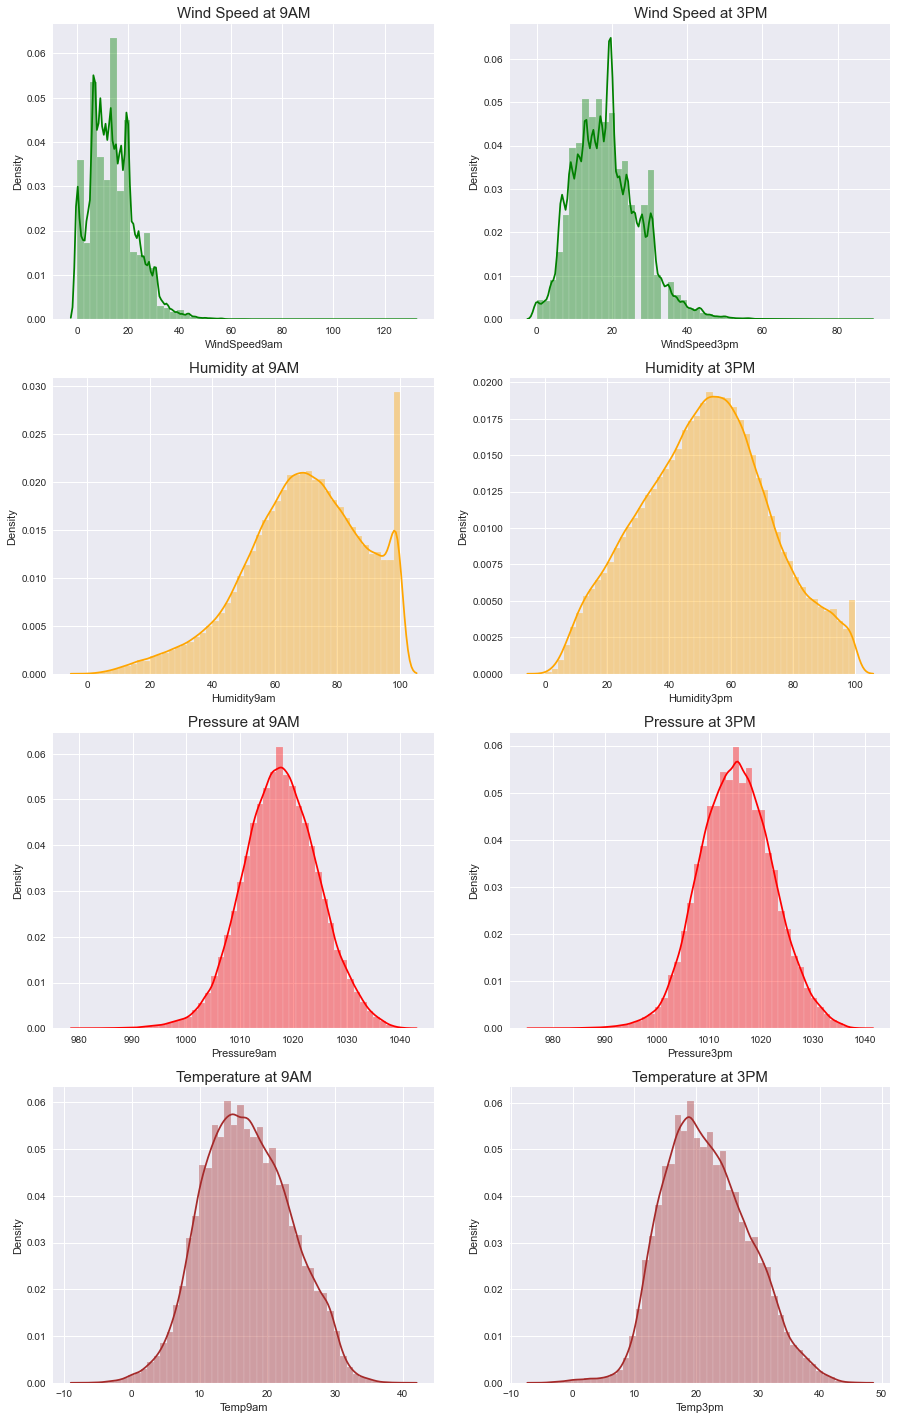

In [20]:
# Distribution of WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm

fig, ax = plt.subplots(4, 2, figsize=(15,25))

# WindSpeed9am
sns.distplot(df_rain['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Wind Speed at 9AM", fontsize=15)

# WindSpeed3pm
sns.distplot(df_rain['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Wind Speed at 3PM", fontsize=15)

# Humidity9am
sns.distplot(df_rain['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.distplot(df_rain['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.distplot(df_rain['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.distplot(df_rain['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title("Pressure at 3PM", fontsize=15)

# Temp9am
sns.distplot(df_rain['Temp9am'], ax=ax[3,0], color='brown')
ax[3,0].set_title("Temperature at 9AM", fontsize=15)

# Temp3pm
sns.distplot(df_rain['Temp3pm'], ax=ax[3,1], color='brown')
ax[3,1].set_title("Temperature at 3PM", fontsize=15)

Observation:-

- Maximum wind speed at 9AM ranges from 10 to 20 km/hr whereas at 3PM it ranges from 15 to 22 km/hr.
- Highest concentration of points for humidity at 9AM is between 60-80% whereas at 3PM it's 40-70%.
- Highest concentration of points for pressure at 9AM is between 1015-1018 hpa and at 3PM it's between 1015-1017 hpa.
- Maximum temperature at 9AM is between 16-18 degree Celcius and at 3PM it's between 21-23 degree Celcius.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

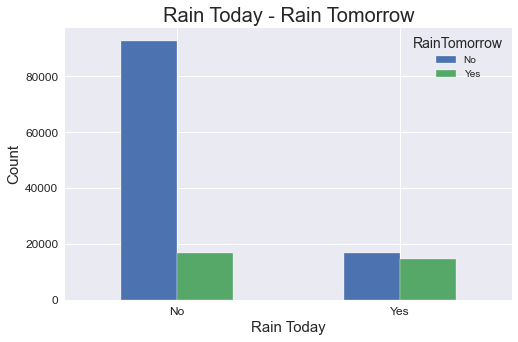

In [21]:
# Analyzing RainToday and RainTomorrow

type_plt = pd.crosstab(df_rain['RainToday'], df_rain['RainTomorrow'])

plt.rcParams["figure.figsize"] = (8,5)

type_plt.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

Observation:-

- For maximum records it didn't rain for both days.
- For nearly 20,000 records it didn't rain today but rained tomorrow and rained for both days.
- For nearly 20,000 records it rained today but didn't rain tomorrow.

sns.boxplot(x = "MinTemp", y = "RainTomorrow", data = df_rain, dodge = True);

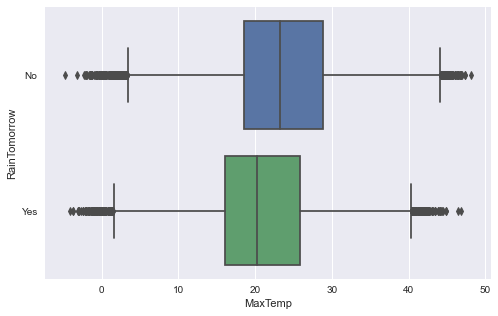

In [22]:
sns.boxplot(x = "MaxTemp", y = "RainTomorrow", data = df_rain, dodge = True);

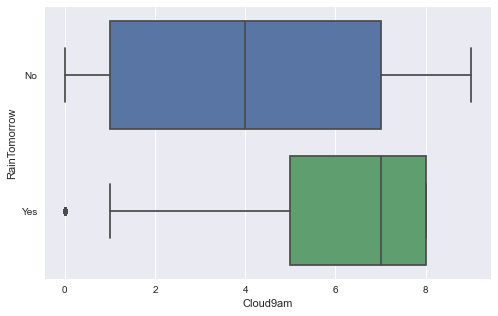

In [23]:
sns.boxplot(x = "Cloud9am", y = "RainTomorrow", data = df_rain, dodge = True);

In [24]:
#(3 pm) vs. Humidity (3 pm)

px.scatter(df_rain.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

From the above graph Raintomorrow with "Yes" has the highest humidity of 100 when Temp3pm is at 20.7 celsius.

In [25]:
px.histogram(df_rain, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

From the above graph Raintomorrow with "No" has the highest count of 1278 when Temp3pm is between (19.2 - 19.3) celsius.

Next, I plotted a count chart of whether it rained the next day.

<AxesSubplot:>

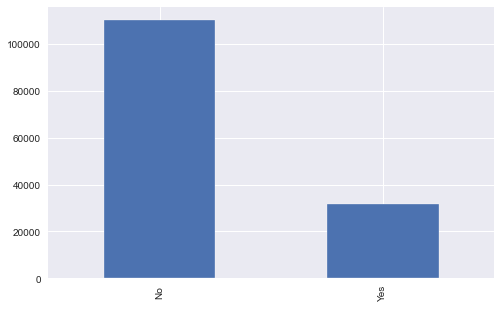

In [26]:
#count chart plot of whether it rained the next day

df_rain['RainTomorrow'].value_counts().plot(kind='bar')

The graph shows that the days of not raining is more than 4 times more than rained in the next. Hence, there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

# 7. Train, Validation, Test Split

Lets use time series data, since it is a collection of observations obtained through repeated measurements over time. Plot the points on a graph, and one of your axes would always be time.

The given data is a time-series data and is in chronological form. While working with chronological data, it's often a good concept to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

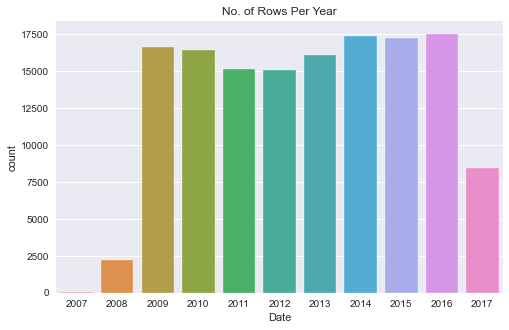

In [27]:
plt.title('No. of Rows Per Year');
sns.countplot(x=pd.to_datetime(df_rain.Date).dt.year);

Lets use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.

To archieve this,

In [28]:
year = pd.to_datetime(df_rain.Date).dt.year

train_df = df_rain[year < 2015]
val_df = df_rain[year == 2015]
test_df = df_rain[year > 2015]

# 8. Identify Inputs & Target Columns

The columns other than RainTomorrow are independent columns (input columns) while the RainTomorrow column is dependent column (output columns).

In [29]:
input_cols = list(train_df.columns[1:-1])
target_cols = train_df.columns[-1]

input_cols,target_cols

(['Location',
  'MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'WindDir9am',
  'WindDir3pm',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'RainToday'],
 'RainTomorrow')

# Identify inputs and outputs

X_train : Training data's inputs
Y_train : Training data's output
Equally for validation and test data.

In [30]:
X_train = train_df[input_cols].copy()
Y_train = train_df[target_cols].copy()

X_val = val_df[input_cols].copy()
Y_val = val_df[target_cols].copy()

X_test = test_df[input_cols].copy()
Y_test = test_df[target_cols].copy()

# 9. Identify Numerical & Categorical Columns

From the information of the dataset shown above, the Dtype column specifies the datatype of the column values. Separate preprocessing steps are to be carried out for categorical data and numerical data. Hence we'll identify the columns which are numerical and which are categorical for preprocessing purposes.

In [31]:
print(df_rain.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

Remove rows for which target column is empty

In [32]:
numeric_cols = list(X_train.select_dtypes(include=np.number).columns)
categorical_cols = list(X_train.select_dtypes(include='object').columns)

numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

# 10. Impute Missing Values

As we have discussed already that preprocessing steps are to be done separately for numerical and categorical columns. First, let's impute the numerical columns with mean of the corresponding columns.

Below code displays the counts of null values in numerical columns sorted in descending order.

In [33]:
X_train[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

Below code imputes the numerical columns with their mean respectively.

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_rain[numeric_cols])

X_train[numeric_cols] = imputer.transform(X_train[numeric_cols])
X_val[numeric_cols] = imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

Now, after imputing the null values with mean, the count of null values are:

In [35]:
X_train[numeric_cols].isna().sum().sort_values(ascending=False)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_rain[numeric_cols])

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 11. Scaling Numerical Columns

Let's learn the importance of scaling before proceeding. Feature Scaling is a method to standardize the independent attributes present in the data in a fixed range. It is done during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [37]:
scaler = MinMaxScaler()
scaler.fit(df_rain[numeric_cols])

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# 12. Encoding Categorical Columns

Let's now learn what is encoding and why it is needed? Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.

Every machine learning models learns only from numerical data which is why it is needed to convert the categorical data to integer format during preprocessing.

The categorical columns in our dataset are,

In [38]:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

Before encoding the categorical columns one must be sure sure that there are no null values in those columns because those columns will also be encoded which doesn't make sense. Hence, the null values in categorical columns should be imputed before encoding the columns. This is similar to imputing numerical columns followed by scaling them.

Below code displays the count of null values in the categorical columns:

In [39]:
X_train[categorical_cols].isna().sum().sort_values(ascending=False)


WindDir9am     7323
WindGustDir    6943
WindDir3pm     2030
RainToday      1000
Location          0
dtype: int64

Imputing is done by considering mean in numerical columns. But this is not the case for categorical columns. For categorical columns either mode can be considered or some other dummy value can be substituted in place of null values. Here, let's substitue 'Unknown' in place of null values. 

This can be archieve as follow:

In [40]:
X_train[categorical_cols] = X_train[categorical_cols].fillna('Unknown')
X_val[categorical_cols] = X_val[categorical_cols].fillna('Unknown')
X_test[categorical_cols] = X_val[categorical_cols].fillna('Unknown')

Now the counts of null values are:

In [41]:
X_train[categorical_cols].isna().sum().sort_values(ascending=False)

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

After imputing the null values let's perform encoding.

In [42]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_cols])

encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols


['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [43]:
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

Let's combine the preprocessed numerical and categorical columns for model training.

In [44]:
X_train = X_train[numeric_cols + encoded_cols]
X_val = X_val[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]

# 13. Training & Visualizing Decision Trees

A decision tree in machine learning works in the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

Being a classification task, let's use DecisionTreeClassifier algorithm.

### Training

In [45]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

We have trained our classifier with the training data.

# Evaluation

To review the training process, let's check how well the model trained with the training data.

In [46]:
X_train_pred = model.predict(X_train)
pd.value_counts(X_train_pred)

No     76707
Yes    22281
dtype: int64

The counts of predicted result shows that our model has predicted more 'No' for the target column RainTomorrow than that of 'Yes'.

Now, let's calculate the accuracy of our model in the training data.

In [47]:
train_probs = model.predict_proba(X_train)
print('Training Accuracy :',accuracy_score(X_train_pred,Y_train)*100)

Training Accuracy : 99.99797955307714


Interesting! The training set accuracy is close to 100%. But we can't depend completely on the training set accuracy, we must evaluate the model on the validation set too. This is because our model should be trained in a generalized way i.e, it should be able to predict output which is not present in training data.

In [48]:
print('Validation Acuracy :',model.score(X_val,Y_val)*100)

Validation Acuracy : 79.28152747954267


Let's also calculate the percentage of 'Yes' and 'No' in validation data.

In [49]:
Y_val.value_counts() / len(Y_val)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

The above result shows 78.8% 'No' and 21% 'Yes' in validation data. This proves that if it is predicted 'No' for all the validation data, it would still be 78.8% accurate in the result (since there are 78.8% 'No' in the validation data). Hence, our model should remain learning only if it exceeds 78.8% accuracy because even predicting 'No' always using a dumb model gives 78.8% accuracy.

# Summary

#### DecisionTreeClassifier with default parameters

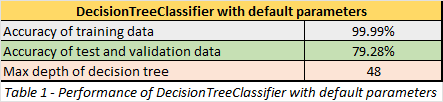

The above case was an overfitting case as tree used the max depth and memorized the values and failed to predict with low accuracy of 79.28% for test and validation dataset

# Visualization of Decision Tree

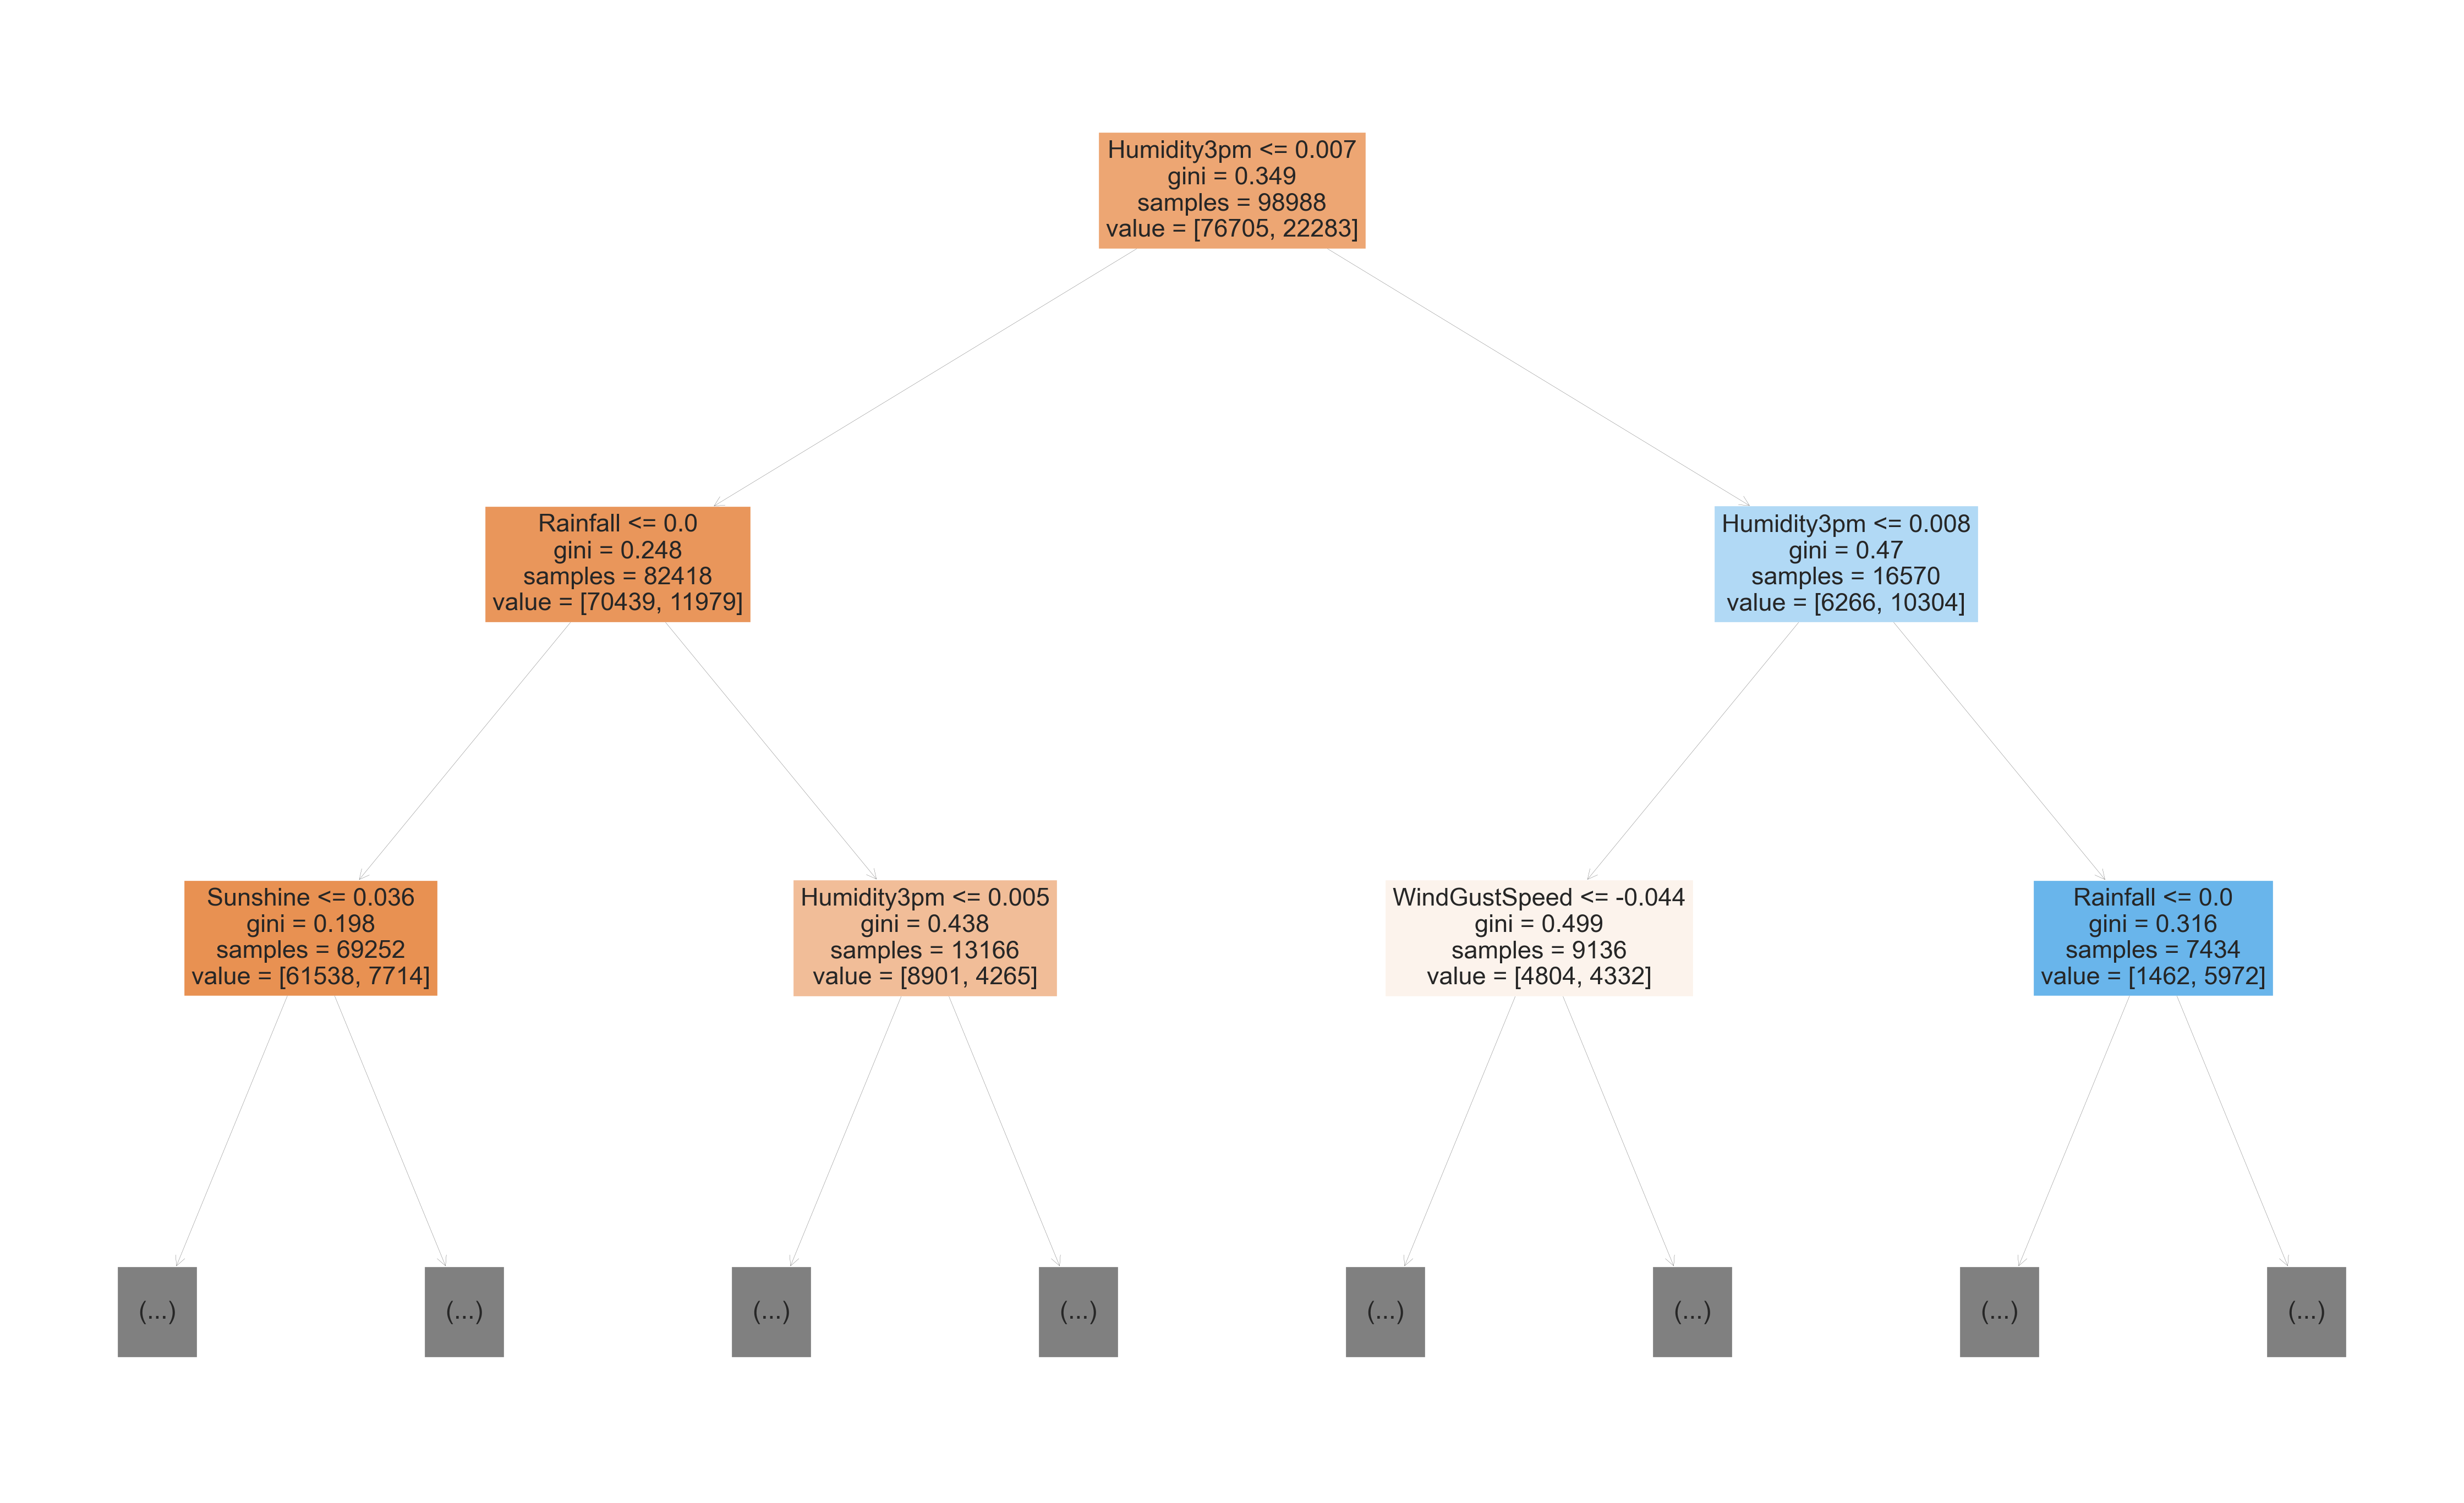

In [50]:
plt.figure(figsize=(80,50))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

# 14. Feature Importance

The initial 23 columns or features after encoding became 119 features. Decision Trees can find importance of features by itself. Below are some of the importances of 119 features(total number of features in the training dataset).

In [51]:
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df


Feature  Importance
9                  Humidity3pm    0.261666
11                 Pressure3pm    0.062909
2                     Rainfall    0.059698
5                WindGustSpeed    0.055278
4                     Sunshine    0.049697
8                  Humidity9am    0.039776
0                      MinTemp    0.034395
14                     Temp9am    0.033930
10                 Pressure9am    0.033880
1                      MaxTemp    0.032072
15                     Temp3pm    0.029998
7                 WindSpeed3pm    0.028790
6                 WindSpeed9am    0.027729
3                  Evaporation    0.024000
13                    Cloud3pm    0.018257
12                    Cloud9am    0.014163
106              WindDir3pm_NW    0.003952
105             WindDir3pm_NNW    0.003545
85                WindDir9am_N    0.003503
88              WindDir9am_NNW    0.003410
72              WindGustDir_NW    0.003352
68               WindGustDir_N    0.003335
102               WindDir3pm_N    0.003297
107               WindDir3pm_S    0.003246
80             WindGustDir_WNW    0.003168
114             WindDir3pm_WNW    0.003097
109             WindDir3pm_SSE    0.003064
100             WindDir3pm_ENE    0.002913
83              WindDir9am_ENE    0.002812
81             WindGustDir_WSW    0.002796
96                WindDir9am_W    0.002779
74              WindGustDir_SE    0.002776
87              WindDir9am_NNE    0.002774
103              WindDir3pm_NE    0.002763
110             WindDir3pm_SSW    0.002752
89               WindDir9am_NW    0.002721
97              WindDir9am_WNW    0.002701
62        Location_Witchcliffe    0.002675
73               WindGustDir_S    0.002621
79               WindGustDir_W    0.002590
77              WindGustDir_SW    0.002587
115             WindDir3pm_WSW    0.002492
86               WindDir9am_NE    0.002487
101             WindDir3pm_ESE    0.002444
76             WindGustDir_SSW    0.002421
69              WindGustDir_NE    0.002418
91               WindDir9am_SE    0.002416
108              WindDir3pm_SE    0.002366
98              WindDir9am_WSW    0.002345
104             WindDir3pm_NNE    0.002325
16           Location_Adelaide    0.002300
70             WindGustDir_NNE    0.002248
113               WindDir3pm_W    0.002228
94               WindDir9am_SW    0.002225
99                WindDir3pm_E    0.002192
75             WindGustDir_SSE    0.002192
84              WindDir9am_ESE    0.002160
82                WindDir9am_E    0.002157
39        Location_MountGinini    0.002078
118              RainToday_Yes    0.002052
27       Location_CoffsHarbour    0.002050
49           Location_Portland    0.002032
90                WindDir9am_S    0.002015
67             WindGustDir_ESE    0.001982
17             Location_Albany    0.001971
71             WindGustDir_NNW    0.001967
111              WindDir3pm_SW    0.001923
28           Location_Dartmoor    0.001906
92              WindDir9am_SSE    0.001899
93              WindDir9am_SSW    0.001881
63         Location_Wollongong    0.001838
51               Location_Sale    0.001800
23           Location_Brisbane    0.001775
38       Location_MountGambier    0.001727
78         WindGustDir_Unknown    0.001688
25           Location_Canberra    0.001573
59            Location_Walpole    0.001568
61        Location_Williamtown    0.001552
47              Location_Perth    0.001546
65               WindGustDir_E    0.001534
31             Location_Hobart    0.001524
20      Location_BadgerysCreek    0.001514
95          WindDir9am_Unknown    0.001492
44          Location_Nuriootpa    0.001488
34          Location_Melbourne    0.001482
43      Location_NorfolkIsland    0.001475
60           Location_Watsonia    0.001468
66             WindGustDir_ENE    0.001454
42          Location_NorahHead    0.001387
56        Location_Tuggeranong    0.001331
18             Location_Albury    0.001304
54      Location_SydneyAirport    0.001287
53             Location_

Note: Only some feature importances are displayed but the above code displays for all features.

Let's view importances of top 10 features.

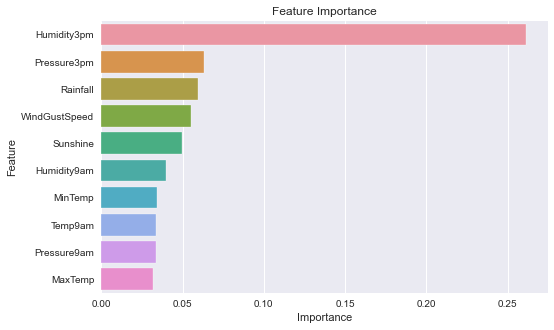

In [52]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(10), x='Importance', y='Feature');

# 15. Hyperparameter Tuning - To Reduce Overfitting

Now that we found out our model is only marginally better than a dumb model because of overfitting, we should modify some of the parameters of DecisionTreeClassifier to reduce overfitting.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

max_depth
max_leaf_nodes
By reducing the tree maximum depth can reduce overfitting. Maximum depth (default) is 48 which is reduced to 3 to reduce overfittting as below.

In [53]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, Y_train)

print('Accuracy in Training Dataset :',model.score(X_train, Y_train)*100)
print('Accuracy in Validation Dataset :',model.score(X_val, Y_val)*100)

Accuracy in Training Dataset : 82.91308037337859
Accuracy in Validation Dataset : 83.34397307178921


#### Hyperparamter tuning

Our model had 100 % training accuracy which means that model is memorising the inputs. Comparing it with validation and test accuracy of approx. 79.28 % we clearly see a case of overfitting. We need to try and make some changes in the parameters of model training to avoid overfitting. One possible way of doing it is to reduce the max depth of the tree. Let us train the model again

In [54]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Let us score the model on training, validation and test dataset again

In [55]:
#Scoring against training dataset
dt.score(X_train, Y_train)

0.8342930456216915

As we can see the training accuracy is just 83% which means the model is not memorising and overfitting the values. Let us try the same for validation and test dataset

In [56]:
#Scoring against validation dataset
dt.score(X_val, Y_val)

0.8356450583251117

We now have a significantly better performance on training and test dataset Let us get the confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
#Confusion matrix for training data
train_pred = dt.predict(X_train)
matrix_train = confusion_matrix(Y_train, train_pred)
print(matrix_train)

matrix_train = classification_report(Y_train, train_pred)
print(matrix_train)

[[72602  4103]
 [12300  9983]]
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     76705
         Yes       0.71      0.45      0.55     22283

    accuracy                           0.83     98988
   macro avg       0.78      0.70      0.72     98988
weighted avg       0.82      0.83      0.82     98988



In [59]:
#Confusion matrix for validation data
validation_pred = dt.predict(X_val)
matrix_validate = confusion_matrix(Y_val, validation_pred)
print(matrix_validate)

matrix_validate = classification_report(Y_val, validation_pred)
print(matrix_validate)

[[12855   728]
 [ 2104  1544]]
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     13583
         Yes       0.68      0.42      0.52      3648

    accuracy                           0.84     17231
   macro avg       0.77      0.68      0.71     17231
weighted avg       0.82      0.84      0.82     17231



In [60]:
test_pred = dt.predict(X_test)
matrix_test = confusion_matrix(Y_test, test_pred)
print(matrix_test)

matrix_test = classification_report(Y_test, test_pred)
print(matrix_test)

[[18875  1153]
 [ 3438  2508]]
              precision    recall  f1-score   support

          No       0.85      0.94      0.89     20028
         Yes       0.69      0.42      0.52      5946

    accuracy                           0.82     25974
   macro avg       0.77      0.68      0.71     25974
weighted avg       0.81      0.82      0.81     25974



### Tuning max_depth

Since the max_depth value without manual constraint for which our model overfitted is 48. And the max_depth value can't be 0 or lesser. Hence, let's find what the best value of max_depth would be by trial and error method and use the max_depth for which the errors of train and validation dataset is optimal.

In [61]:
def max_depth_accuracy1(max_depth_val):
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth_val)
    model.fit(X_train, Y_train)
    train_accuracy = model.score(X_train, Y_train)*100
    val_accuracy = model.score(X_val, Y_val)*100
    return {'Max_Depth' : max_depth_val, 'Training_Accuracy' : train_accuracy, 'Validation_Accuracy' : val_accuracy}

accuracies_df1 = pd.DataFrame([max_depth_accuracy1(i) for i in range(1,48)])
accuracies_df1


Max_Depth  Training_Accuracy  Validation_Accuracy
0           1          81.568473            82.206488
1           2          82.045298            82.728803
2           3          82.913080            83.343973
3           4          83.429305            83.564506
4           5          83.932396            84.092624
5           6          84.372853            84.272532
6           7          84.668849            84.533689
7           8          85.219421            84.220301
8           9          85.908393            84.336370
9          10          86.703439            84.237711
10         11          87.675274            84.069410
11         12          88.655191            83.872091
12         13          89.813917            83.460043
13         14          90.997899            83.361384
14         15          92.103083            82.752017
15         16          93.170889            82.450235
16         17          94.161919            82.334165
17         18          95.128702            81.806047
18         19          96.008607            81.306947
19         20          96.777387            81.185073
20         21          97.381501            80.587314
21         22          97.931062            80.593117
22         23          98.352326            80.291335
23         24          98.687720            80.064999
24         25          98.949368            79.948929
25         26          99.164545            79.740003
26         27          99.324161            79.786431
27         28          99.474684            79.542685
28         29          99.570655            79.444025
29         30          99.636320            79.705183
30         31          99.734311            79.316348
31         32          99.813109            79.380187
32         33          99.830282            79.188672
33         34          99.870691            79.246707
34         35          99.911100            79.090012
35         36          99.927264            79.043584
36         37          99.933325            79.258314
37         38          99.960601            79.345366
38         39          99.966663            79.171261
39         40          99.977775            79.385990
40         41          99.987877            79.438222
41         42          99.985857            79.264117
42         43          99.993939            79.327955
43         44          99.995959            79.153851
44         45          99.996969            79.298938
45         46          99.997980            79.159654
46         47          99.997980            79.090012

From the dataframe above, it can be seen that the training accuracy increases with increase in max_depth. Also, it is noted that validation accuracy first increases and then decreases.

### Tuning Graph

Let'us visualise the training accuracy and validation accuracy with different max_depths.

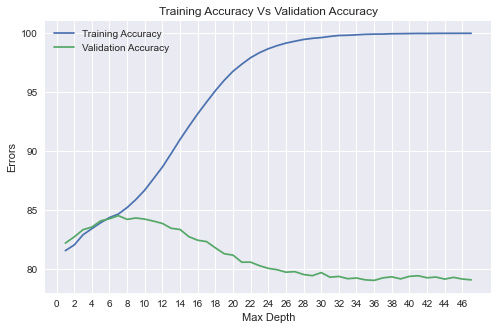

In [62]:
plt.title('Training Accuracy Vs Validation Accuracy');
plt.plot(accuracies_df1['Max_Depth'], accuracies_df1['Training_Accuracy']);
plt.plot(accuracies_df1['Max_Depth'], accuracies_df1['Validation_Accuracy']);
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.xticks(range(0,48, 2))
plt.xlabel('Max Depth');
plt.ylabel('Errors');

From the graph it can also be seen that training accuracy increases with increase in max_depth while validation accuracy first increases (till max_depth = 7) and then decreases. Hence, optimal max_depth is 7.

### Build Decision Tree with max_depth = 7

In [63]:
model = DecisionTreeClassifier(random_state=42, max_depth=7)
model.fit(X_train, Y_train)
print('Training Accuracy :', model.score(X_train,Y_train)*100)
print('Validation Accuracy :', model.score(X_val, Y_val)*100)

Training Accuracy : 84.66884874934335
Validation Accuracy : 84.53368928094713


### Tuning max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This enables branches of the tree to have varying depths. Let's limit the number of leaf nodes to 128 at maximum.

In [64]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, Y_train)
print('Training Accuracy :', model.score(X_train,Y_train)*100)
print('Validation Accuracy :', model.score(X_val, Y_val)*100)

Training Accuracy : 84.80421869317493
Validation Accuracy : 84.42342290058616


Let's see the accuracies when max_leaf_nodes was set to 128 at maximum.

In [65]:
accuracies_df1.loc[accuracies_df1['Max_Depth'] == model.tree_.max_depth]

Max_Depth  Training_Accuracy  Validation_Accuracy
11         12          88.655191            83.872091

Now, let's train our DecisionTreeClassifier with max_leaf_nodes = 128 and max_depth = 6,

In [66]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42, max_depth=6)

Let's now use the trial and error method considering the two parameters.

In [67]:
def max_depth_accuracy2(max_depth_val):
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth_val, max_leaf_nodes=128)
    model.fit(X_train, Y_train)
    train_accuracy = model.score(X_train, Y_train)*100
    val_accuracy = model.score(X_val, Y_val)*100
    return {'Max_Depth' : max_depth_val, 'Training_Accuracy' : train_accuracy, 'Validation_Accuracy' : val_accuracy}


In [68]:
accuracies_df2 = pd.DataFrame([max_depth_accuracy2(i) for i in range(1,14)])
accuracies_df2

Max_Depth  Training_Accuracy  Validation_Accuracy
0           1          81.568473            82.206488
1           2          82.045298            82.728803
2           3          82.913080            83.343973
3           4          83.429305            83.564506
4           5          83.932396            84.092624
5           6          84.372853            84.272532
6           7          84.668849            84.533689
7           8          84.904231            84.382798
8           9          84.896149            84.464047
9          10          84.810280            84.464047
10         11          84.813311            84.469851
11         12          84.804219            84.423423
12         13          84.804219            84.423423

### Tuning Graph

Let'us visualise the training accuracy and validation accuracy with different max_depths and max_leaf_nodes = 128.

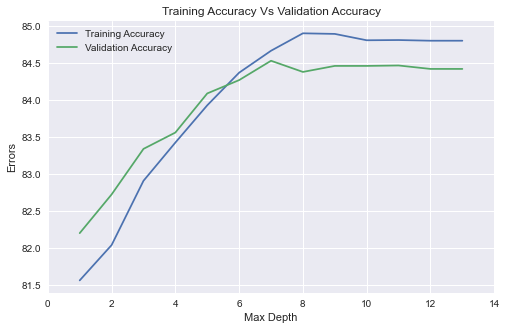

In [69]:
plt.title('Training Accuracy Vs Validation Accuracy');
plt.plot(accuracies_df2['Max_Depth'], accuracies_df2['Training_Accuracy']);
plt.plot(accuracies_df2['Max_Depth'], accuracies_df2['Validation_Accuracy']);
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.xticks(range(0,16, 2))
plt.xlabel('Max Depth');
plt.ylabel('Errors');

It seems max_depth = 9 and max_leaf_nodes = 128 is the optimal hyperparameters

Now, let's train our classifier with the best found hyperparameters,

In [70]:
model = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=128, random_state=42)
model.fit(X_train, Y_train)
print('Training Accuracy :', model.score(X_train,Y_train)*100)
print('Validation Accuracy :', model.score(X_val, Y_val)*100)

Training Accuracy : 84.89614902816504
Validation Accuracy : 84.46404735650862


### DecisionTreeClassifier with max_depth = 9

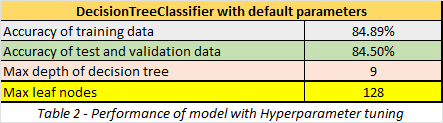

The above performance is considerable better for new predictions as accuracy of training data, test data and validation data is almost the same.

#### Decision Tree Classification Confusion Matrix

In [71]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

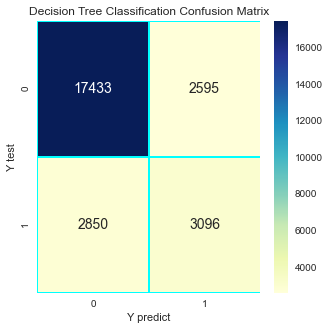

In [72]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [73]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.7903672903672904


# 16. Random Forest Algorithm Training

Ramdom Forest is an ensemble technique where

Multiple DecisionTrees will be trained with different hyperparatmers
Outcome of each DecisionTree will be voted / averaged
The one with most count in terms of Classifier will be the winner prediction

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 1, random_state = 42)

In [75]:
%%time
rfc.fit(X_train, Y_train)

Wall time: 25 s


RandomForestClassifier(n_jobs=1, random_state=42)

Let us now get the score of model for train, test and validation dataset.

In [76]:
print("Training accuracy = ", rfc.score(X_train, Y_train) * 100, "%")

Training accuracy =  99.99595910615429 %


In [77]:
print("Validation accuracy = ", rfc.score(X_val, Y_val) * 100, "%")

Validation accuracy =  85.58412164122802 %


In [78]:
print("Test accuracy = ", rfc.score(X_test, Y_test) * 100, "%")

Test accuracy =  84.00323400323401 %


#### Random Forest Classification Confusion Matrix

In [79]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

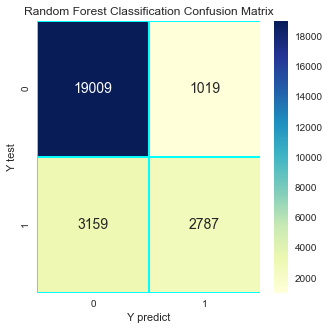

In [80]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

From the above confusion matrix, there are 19,009 true negative values, 3,159 false negative values, 1,019 false positive values, and 2,787 true positive values. This illustrate that the best model is the Random Forest model.

In [81]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.8391468391468392


The notebook also has an implementation of RandomForest with training accuracy 99.99% and a validation accuracy of 85.58%.

Finaly, one can establish that the Random Forest model is better in the sense it yields higher accuracy than other models.

# 17. Conclusion:

For the decision tree model, the training accuracy is 99.99%, validation accuracy is 79.28% and the percentage of 'No' in validation data is 78.8%. Hence, our model is only marginally better than always predicting "No". This occurs because the training data from which our model learned remains skewed towards 'No'Decision tree overfit.

After an Hyperparamter tuning was applied to make some changes in the parameters of the model training to avoid overfitting. We were able to predict with a training accuracy of 84.89% and validation accuracy of 84.46% using DecisionTree.

Sklearn best understands the value of hyperparameters but it sometimes fail for specific use cases and leave it up to Data scientists to tune the hyperparamters. DecisionTree and RadomForest are always at a risk of overfitting.

Also, the notebook has an implementation of RandomForest with training accuracy 99.99% and a validation accuracy of 85.58%. The Random Forest model has the highest validation accuracy among these two with an approximately 86.0%. From the performance of the two models, Random Forest is greater than Decision Tree.

Finaly, one can establish that the Random Forest model is better in the sense it yields higher accuracy than other models.